In [17]:
# import dependencies
import pandas as pd
import nltk

# will need to uncomment the following the first time you run
# nltk.download('punkt')

from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [18]:
r_cols = ["user id", "item id", "rating", "timestamp"]
ratings = pd.read_csv('../ml-100k/u.data', sep='\t', names=r_cols,encoding='latin-1')
ratings.head()

,user id,item id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [19]:
u_cols = ["user id", "age", "gender", "occupation", "zip code"]
users = pd.read_csv('../ml-100k/u.user', sep='|', names=u_cols,encoding='latin-1')
users.head()

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [20]:
# merge movies and ratings
df = pd.merge(ratings, users, on="user id")
df.sort_values("user id").head()

,user id,item id,rating,timestamp,age,gender,occupation,zip code
20397,1,61,4,878542420,24,M,technician,85711
20558,1,270,5,888732827,24,M,technician,85711
20557,1,40,3,876893230,24,M,technician,85711
20556,1,211,3,878541970,24,M,technician,85711
20555,1,141,3,878542608,24,M,technician,85711


In [21]:
df["occupation"].describe()

count      100000
unique         21
top       student
freq        21957
Name: occupation, dtype: object

In [22]:
# i_cols = ["item id", "movie title", "release date", "video release date", "IMDB URL", "unknown", "action", "adventure", "animation", "children's", "comedy", "crime", "documentary", "drama", "fantasy", "film-noir", "horror", "musical", "mystery", "romance", "sci-fi", "thriller", "war", "western"]
# items = pd.read_csv('../ml-100k/u.item', sep='|', names=i_cols,encoding='latin-1')
# items.head()

In [23]:
# items.drop(['IMDB URL'],axis=1, inplace=True)
# items.drop(['release date'],axis=1, inplace=True)
# items.drop(['video release date'],axis=1, inplace=True)
# items.head()

In [24]:
# merge movies and ratings
# df = pd.merge(df, items, on="item id")
# df.sort_values("user id").head()

In [29]:
# LabelEncoder

le = preprocessing.LabelEncoder()
# df['label'] = le.fit_transform(df.label.values)

df['gender'] = le.fit_transform(df['gender'])
df['occupation'] = le.fit_transform(df['occupation'])


count    100000.000000
mean         11.076340
std           6.622849
min           0.000000
25%           4.000000
50%          13.000000
75%          18.000000
max          20.000000
Name: occupation, dtype: float64

In [30]:
# use drop to get features
data = df.drop(['timestamp', 'zip code'],axis=1, inplace=True)

In [31]:
data = df.apply(pd.to_numeric) 
data = df.fillna(value=5)

# convert to int
# df['rating'] = df['rating'].astype(int) 
target = df["rating"]

In [32]:
data.drop(["rating"],axis=1, inplace=True)

In [33]:
# data = df[["userId", "movieId", "year", "genresVect"]]
data = data
feature_names = data.columns
data.head()

,user id,item id,age,gender,occupation
0,196,242,49,1,20
1,196,393,49,1,20
2,196,381,49,1,20
3,196,251,49,1,20
4,196,655,49,1,20


In [34]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [35]:
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.33728

In [36]:
importances = rf.feature_importances_
importances

array([0.15301168, 0.6780156 , 0.10066276, 0.00923617, 0.05907378])

In [37]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.6780156027750129, 'item id'),
 (0.1530116822290346, 'user id'),
 (0.10066276214185071, 'age'),
 (0.05907378355052459, 'occupation'),
 (0.009236169303577192, 'gender')]

No handles with labels found to put in legend.


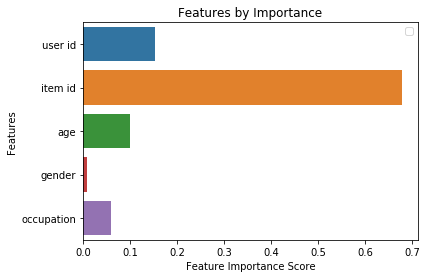

In [38]:
sns.barplot(x=importances, y=feature_names)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Features by Importance")
plt.legend()
plt.show()